In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
import os

# Check if the code is running on Google Colab
try:
    from google.colab import drive
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Mount Google Drive
    drive.mount('/content/drive')

    # Set notebook path in Google Colab
    notebook_path = "/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING | GROUP SUBMISSIONS/5_Project"

    # Change the current working directory to notebook path
    os.chdir(notebook_path)

    # Print current working directory
    print(os.getcwd())


Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1NgQY3gxMbXyifvUAA4jlC29EvpfGl4DT/MACHINE LEARNING | GROUP SUBMISSIONS/5_Project


In [ ]:
df = pd.read_csv("cleaned_data(Top_20features_Anova).csv")
display(df)

,relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),cloud_cover_high (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_speed_100m (km/h),...,soil_temperature_0_7cm (°C),soil_temperature_7_28cm (°C),soil_temperature_28_100cm (°C),soil_temperature_100_255cm (°C),soil_moisture_0_7cm (m³/m³),soil_moisture_7_28cm (m³/m³),soil_moisture_28_100cm (m³/m³),is_day (),sunshine_duration (s),temperature_class
0,88,21.3,27.3,1012.8,1007.3,100,0.02,0.35,4.6,3.5,...,25.8,27.3,28.1,28.4,0.434,0.459,0.483,1,0.0,Light
1,82,21.6,29.2,1013.7,1008.3,100,0.10,0.58,2.6,1.8,...,26.2,27.3,28.1,28.4,0.434,0.458,0.483,1,2567.5,Light
2,75,21.6,30.6,1014.4,1009.0,100,0.23,0.88,3.6,4.4,...,27.3,27.3,28.1,28.4,0.432,0.458,0.483,1,3600.0,Moderate
3,68,21.2,31.6,1014.1,1008.7,100,0.40,1.19,4.3,5.1,...,28.9,27.3,28.1,28.4,0.427,0.458,0.483,1,3600.0,Moderate
4,62,21.0,34.2,1013.3,1007.9,100,0.58,1.52,5.1,6.1,...,30.7,27.5,28.1,28.4,0.420,0.458,0.483,1,3600.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,91,23.5,30.6,1010.1,1004.7,34,0.00,0.29,2.2,2.8,...,26.8,29.2,28.9,29.2,0.443,0.477,0.495,0,0.0,Moderate
8780,94,23.7,29.9,1009.4,1004.0,36,0.00,0.17,4.0,5.5,...,26.5,29.1,28.9,29.2,0.444,0.476,0.495,0,0.0,Light
8781,91,23.4,30.5,1009.7,1004.3,99,0.00,0.28,1.5,3.4,...,26.3,28.9,28.9,29.2,0.445,0.476,0.495,0,0.0,Moderate
8782,96,23.7,29.9,1009.8,1004.4,81,0.00,0.13,2.5,3.6,...,26.1,28.8,28.9,29.2,0.445,0.475,0.495,0,0.0,Light


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   relative_humidity_2m (%)         8784 non-null   int64  
 1   dew_point_2m (°C)                8784 non-null   float64
 2   apparent_temperature (°C)        8784 non-null   float64
 3   pressure_msl (hPa)               8784 non-null   float64
 4   surface_pressure (hPa)           8784 non-null   float64
 5   cloud_cover_high (%)             8784 non-null   int64  
 6   et0_fao_evapotranspiration (mm)  8784 non-null   float64
 7   vapour_pressure_deficit (kPa)    8784 non-null   float64
 8   wind_speed_10m (km/h)            8784 non-null   float64
 9   wind_speed_100m (km/h)           8784 non-null   float64
 10  wind_gusts_10m (km/h)            8784 non-null   float64
 11  soil_temperature_0_7cm (°C)      8784 non-null   float64
 12  soil_temperature_7_2

# **Data Visualization using PCA**

PCA works by finding the directions (principal components) in which the data varies the most.

Firstly, normalization has to be done to ensure that all variables are contributing equally to the analysis.

Normalization ensures that all variables are on the same scale, preventing variables with larger magnitudes from dominating the principal components. Without normalization, variables with larger scales could disproportionately influence the principal components, leading to biased results.

In [ ]:
# Separate features and target attribute
X = df.drop(columns=['temperature_class'])
y = df['temperature_class']

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape after normalizing:", X_scaled.shape)
print("Mean after normalizing:", X_scaled.mean(axis=0))
print("Standard Deviation after normalizing:", X_scaled.std(axis=0))

Shape after normalizing: (8784, 20)
Mean after normalizing: [ 2.07079850e-16 -2.98971534e-15 -7.49046645e-16  5.87524362e-14
 -1.10098532e-13 -1.11628982e-16  1.29424906e-17 -1.68252378e-16
  1.22953661e-16  3.36504756e-16  4.28720002e-17 -2.84734794e-16
 -2.78263549e-16 -3.68213859e-15  5.58144909e-16  2.84734794e-16
 -3.23562266e-16 -2.32964831e-16 -1.82408227e-16  2.42671699e-17]
Standard Deviation after normalizing: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Determine the number of principle components to use**

Plotting a scree plot to determine the number of Principle components to use.A scree plot shows how much variation each PC captures from the data.
The PCs with the highets percentage of explained variance will be used as the PC of our data

In [ ]:
pca = PCA()
pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)
pca_data

array([[-3.08285475e+00,  3.37740258e+00,  2.30662018e-02, ...,
         3.50257519e-02,  2.41626515e-02,  1.80874305e-02],
       [-2.18838635e+00,  3.96789455e+00, -1.38445050e+00, ...,
         2.51626357e-02,  4.23749180e-02, -1.33945975e-02],
       [-1.02733629e+00,  4.41165865e+00, -1.64521493e+00, ...,
        -5.34173224e-02,  9.18694535e-03, -5.87051646e-03],
       ...,
       [-2.95848211e+00,  9.62791574e-01,  1.27920627e-01, ...,
        -3.01622233e-02,  1.35832064e-02, -7.31374278e-04],
       [-3.29636610e+00,  7.91966388e-01,  1.64131373e-01, ...,
         2.43935145e-02, -3.09055801e-02, -4.11541043e-03],
       [-3.05146546e+00,  8.66371082e-01,  2.91030669e-01, ...,
        -7.29139589e-03, -7.23727596e-03, -8.04647698e-03]])

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']
[34.9 18.1  9.8  9.4  8.8  4.9  4.4  2.7  1.7  1.3  1.1  0.9  0.7  0.5
  0.4  0.3  0.2  0.   0.   0. ]


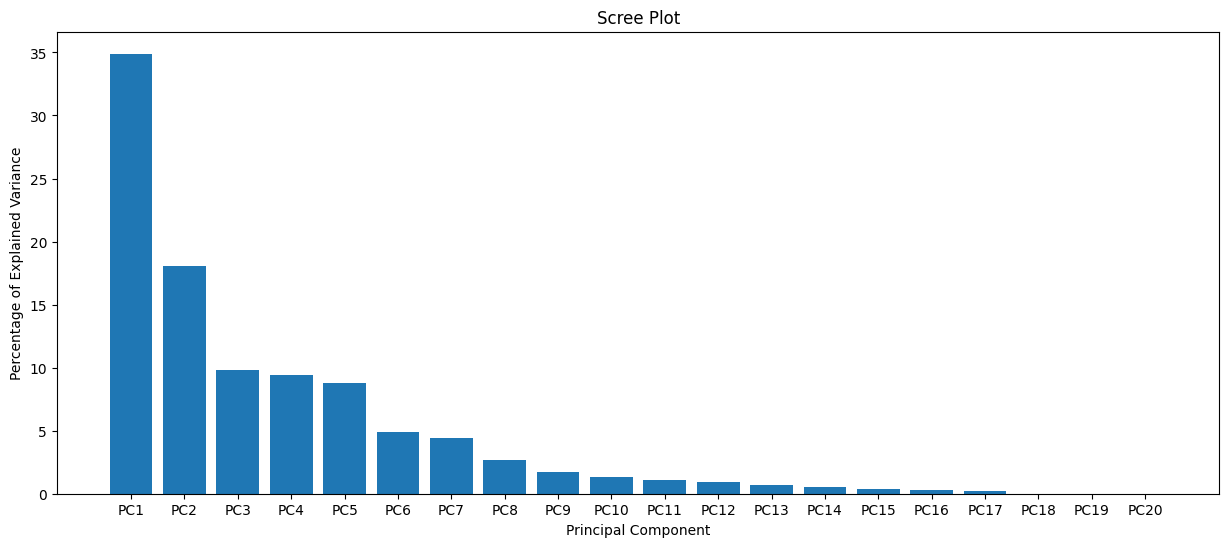

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1) #calculate the percentage of variation each PC accounts for
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

print(labels)
print(per_var)


plt.figure(figsize=(15, 6))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
explained_variance = sum(per_var[:5])
explained_variance

81.0

From the graph and data above, PC1-PC5 is enough to explain 81.0 percent of the variations in the data. Since we are unable to visualise 5 PCs, we will visualize 1, 2 and 3 principle components

**Data Visualization using PCA for 1 component**

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, y], axis=1)

# Explained variation per principal component
print("\nExplained variation per principal component:")
print(pca.explained_variance_ratio_)

print("\nPCA DataFrame:")
pca_df.head()


Explained variation per principal component:
[0.34890743 0.18080846]

PCA DataFrame:


,PC1,PC2,temperature_class
0,-3.082855,3.377403,Light
1,-2.188386,3.967896,Light
2,-1.027336,4.411661,Moderate
3,0.139498,4.759304,Moderate
4,1.582387,4.939561,Moderate


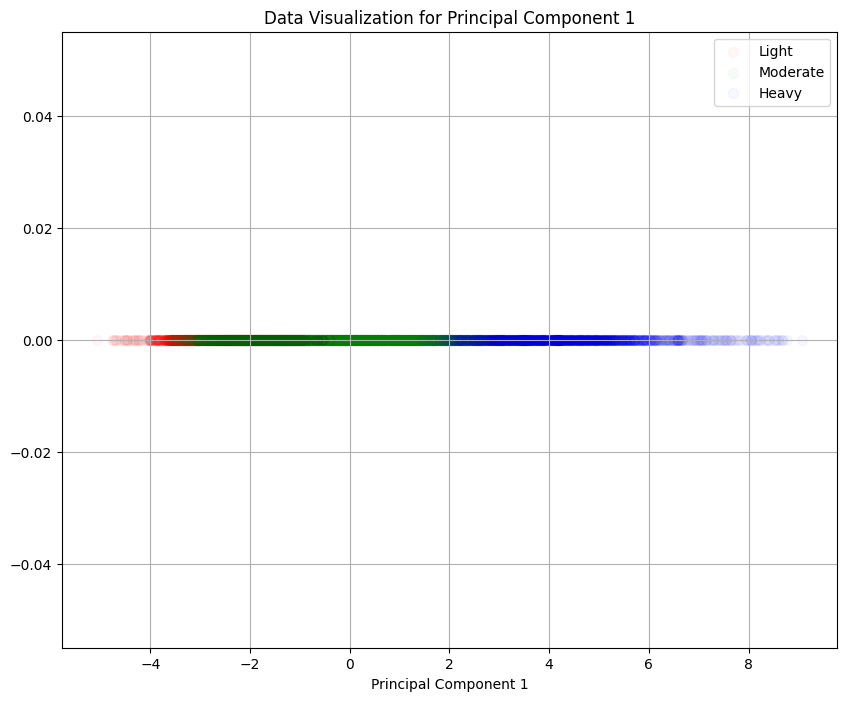

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
targets = pca_df['temperature_class'].unique()
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = pca_df['temperature_class'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC1'],
                [0]*len(pca_df.loc[indices_to_keep, 'PC1']),  # Adjust y-values to 0 for PC1 only
                c=color,
                s=50,
                alpha=0.03)

plt.xlabel('Principal Component 1')
plt.title('Data Visualization for Principal Component 1')
plt.legend(targets)
plt.grid()
plt.show()


As we can see from the PCA plot, the red points, signifying the 'Light' class are clustered together hence correlated with each other. The green points, signifying the 'Moderate' class are clustered together, hence correlated with each other. The blue points, signifying the 'Heavy' class are clustered together, hence correlated with each other.

The separation of the samples along the principal component 1 x-axis suggests that the light class is quite different from heavy class. But there is quite a heavy overlap between the light class and moderate class which indicates that there might be similarities or shared characteristics between these two classes, leading to some level of ambiguity in distinguishing them based on the pc 1 only. There is also some overlap between the moderate class and heavy.

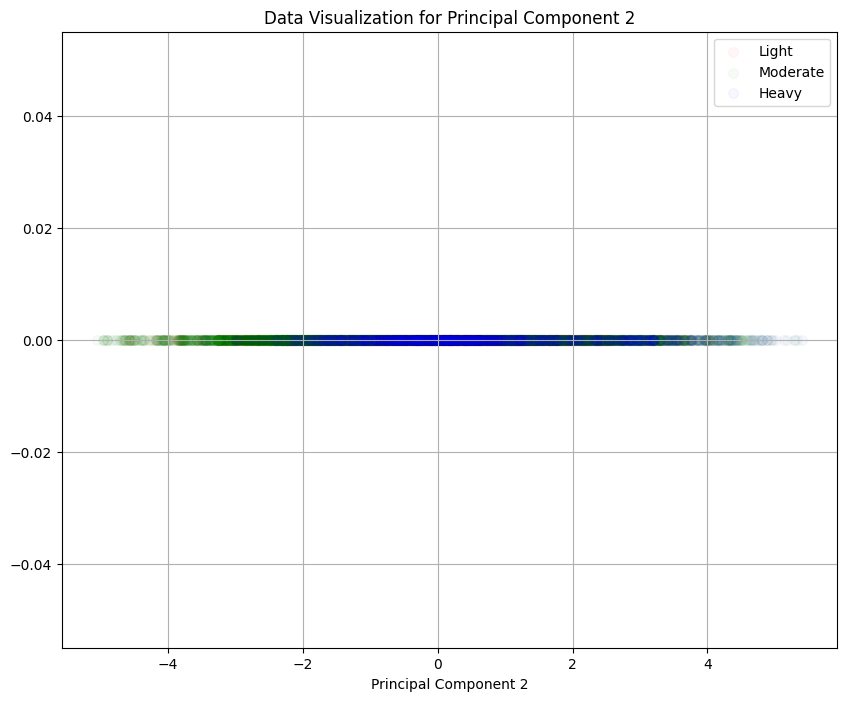

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
targets = pca_df['temperature_class'].unique()
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = pca_df['temperature_class'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC2'],
                [0]*len(pca_df.loc[indices_to_keep, 'PC2']),  # Adjust y-values to 0 for PC1 only
                c=color,
                s=50,
                alpha=0.03)

plt.xlabel('Principal Component 2')
plt.title('Data Visualization for Principal Component 2')
plt.legend(targets)
plt.grid()
plt.show()



When performing PCA, the first principal component (PC1) typically captures the most variation present in the dataset, while the subsequent components, such as PC2, capture progressively less.

Visualizing for PC2, we can see that this does not capture as much variation as PC1. The 'light' class does not appear to be represented.

**Data Visualization using PCA for 2 component**

In [ ]:
# Explained variation per principal component
print("\nExplained variation per principal component:")
print(pca.explained_variance_ratio_)

print("\nPCA DataFrame:")
pca_df.head()


Explained variation per principal component:
[0.34890743 0.18080846]

PCA DataFrame:


,PC1,PC2,temperature_class
0,-3.082855,3.377403,Light
1,-2.188386,3.967896,Light
2,-1.027336,4.411661,Moderate
3,0.139498,4.759304,Moderate
4,1.582387,4.939561,Moderate


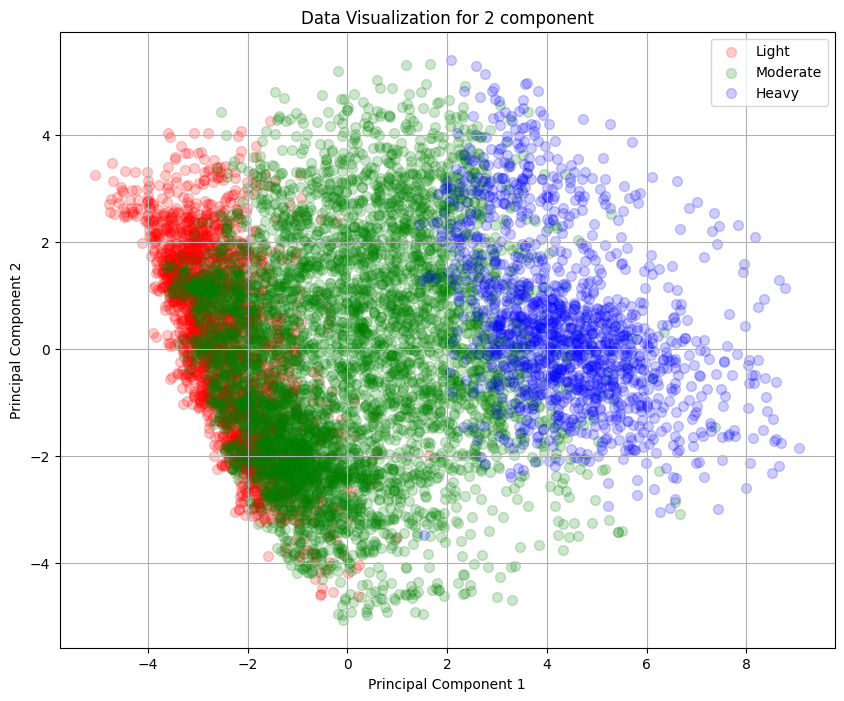

In [ ]:
plt.figure(figsize=(10, 8))
targets = pca_df['temperature_class'].unique()
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = pca_df['temperature_class'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC1'],
                pca_df.loc[indices_to_keep, 'PC2'],
                c=color,
                s=50,
                alpha=0.2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Visualization for 2 component')
plt.legend(targets)
plt.grid()
plt.show()

By adding another principal component in (pc2), we can capture more variation.  This 2D space plotted above using pc1 as x axis and pc2 as y axis, captures more variation in the data compared to pc1 alone, as pc2 captures additional variance that is not explained by pc1.


Despite this, we can see that there is still some overlap between the moderate class as well as the light class. Therefore, we would need to visualise 3 PCs.

**Data Visualization using PCA for 3 component**

In [ ]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df = pd.concat([pca_df, y], axis=1)

# Explained variation per principal component
print("\nExplained variation per principal component:")
print(pca.explained_variance_ratio_)

print("\nPCA DataFrame:")
pca_df.head()


Explained variation per principal component:
[0.34890743 0.18080846 0.09832771]

PCA DataFrame:


,PC1,PC2,PC3,temperature_class
0,-3.082855,3.377403,0.023070,Light
1,-2.188386,3.967895,-1.384449,Light
2,-1.027336,4.411659,-1.645215,Moderate
3,0.139498,4.759303,-1.501618,Moderate
4,1.582387,4.939561,-1.293491,Moderate


In [ ]:
import plotly.graph_objs as go

traces = []
targets = pca_df['temperature_class'].unique()
colors = ['red', 'green', 'blue']

for target, color in zip(targets, colors):
    indices_to_keep = pca_df['temperature_class'] == target
    trace = go.Scatter3d(
        x=pca_df.loc[indices_to_keep, 'PC1'],
        y=pca_df.loc[indices_to_keep, 'PC2'],
        z=pca_df.loc[indices_to_keep, 'PC3'],
        mode='markers',
        marker=dict(color=color, size=5),
        name=target
    )
    traces.append(trace)

layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    ),
    title='Data Visualization for 3 component',
    legend=dict(orientation='h', x=0.9, y=1.1)
)

fig = go.Figure(data=traces, layout=layout)
fig.show()


With 3 PCs, we can see even clearer the separation between the light, moderate and heavy classes. In conclusion, based on the PCA plots we have created, the heavy class is very different from the light class, but for the moderate class, it does have some overlap between the heavy and light class but seems to overlap more with the light class.

#Loading scores


Loading scores are used to describe how much each original feature contributes to the definition of the principal components.

The magnitude of the loading scores indicates the strength of the relationship between the original variables and the principal components. Variables with higher absolute loading scores contribute more to the principal components than variables with lower absolute loading scores.

The signs (+/-), indicate positive or negative correlation with the PC.



In [ ]:
loading_scores = pd.Series(pca.components_[0], index=X.columns)
# sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

#get the names of the top 10 features
top_10 = sorted_loading_scores[0:10].index.values

#print the features names and their scores (and +/- sign)
print(loading_scores[top_10])

vapour_pressure_deficit (kPa)      0.348596
soil_temperature_0_7cm (°C)        0.345927
relative_humidity_2m (%)          -0.345416
et0_fao_evapotranspiration (mm)    0.321860
apparent_temperature (°C)          0.316723
sunshine_duration (s)              0.301137
wind_gusts_10m (km/h)              0.289484
is_day ()                          0.260243
wind_speed_10m (km/h)              0.201133
soil_moisture_0_7cm (m³/m³)       -0.161132
dtype: float64


Reference
1. https://www.youtube.com/watch?v=Lsue2gEM9D0&t=596s
2. https://www.youtube.com/watch?v=FgakZw6K1QQ
3. https://bioturing.medium.com/how-to-read-pca-biplots-and-scree-plots-186246aae063
4. https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/multivariate/how-to/principal-components/interpret-the-results/all-statistics-and-graphs/